In [20]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/'
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'

def cclab(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    numerator = '\\mathrm{P}_{%s \\times %s}(%s)'%(name1, name2, fn)
    denom = '\\mathrm{P}_{%s}(%s) \\mathrm{P}_{%s}(%s)'%(name1, fn, name2, fn)
    CORRCOEF = 'r $(%s)$ = $\\frac{%s}{\\sqrt{%s}}$'%(fn, numerator, denom)
    return CORRCOEF

def ccrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    out = 'r$_{%s}$ $(%s)$ / r$_{%s}$ $(%s)$'%(name1, fn, name2, fn)
    return out

def pkrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    return "P$_{%s}$ $(%s)$ / P$_{%s}$ $(%s)$"%(name1, fn, name2, fn)

In [2]:
ds = pkl.load(open('binth_coef.pkl', 'rb'))
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1,-1), frameon = False, loc = 'upper right', fontsize = 12)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['blue', 'red', 'resolved'], [r'HI $\times$ Blue', r'HI $\times$ Red', r'HI $\times$ Galaxies'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
lowbin = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^8$'
midbin =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^9$'
highbin = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
bins = ['low-bin', 'mid-bin', 'high-bin']
threshs = ['low-threshold', 'mid-threshold', 'high-threshold']
ds.displayAs('HI_res', bins, [lowbin, midbin, highbin])
ds.setOrder('HI_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('copper', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('HI_res', bins[i], {'color':colors[i]})
    ds.plotArgs('HI_res', threshs[i], {'color':colors[i]})
ds.plotArgs('HI_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
midth =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('HI_res', threshs, [lowth, midth, highth])

lowbin = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^9$'
midbin =r'10$^9 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{10}$'
highbin = r'10$^{10} \leq$ M$_{\star}$/M$_\odot$'
ds.displayAs('gal_res', bins, [lowbin, midbin, highbin])
ds.setOrder('gal_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('viridis', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('gal_res', bins[i], {'color':colors[i]})
    ds.plotArgs('gal_res', threshs[i], {'color':colors[i]})
ds.plotArgs('gal_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$'
midth =r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^{10} \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('gal_res', threshs, [lowth, midth, highth])

ds.displayAs('censat', ['centrals', 'satellites', 'both', 'centrals_both', 'satellites_both', 'both_satellites', 'both_centrals'],
            ['Central Galaxies', 'Satellite Galaxies', 'Both', 'HI in Centrals', 'HI in Satellites', 'Satellite Galaxies', 'Central Galaxies'])

# Galaxy Auto Power Stellar Mass Bins

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


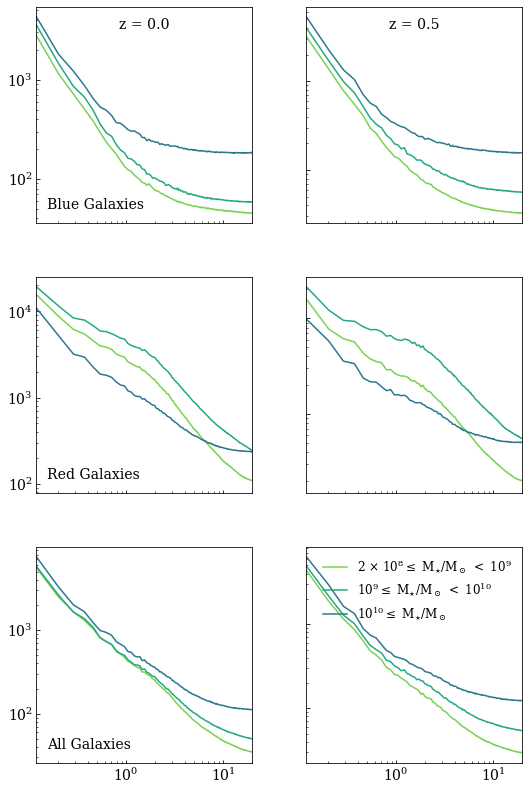

In [3]:
ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy'}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])
fg.setDefaultTicksParams()
fg.plot()

When binning by stellar mass, the blue and all galaxies exhibit the expected behavior, where the halos with the greater stellar mass will cluster more strongly than lower masses. However, unusually, the lower mass bins in the red galaxies cluster more strongly than the higher mass galaxies.

## Making a Paper figure for Galaxy Auto power spectra

The row values for color: ['blue', 'red', 'resolved']
The column values for : ['no key found']


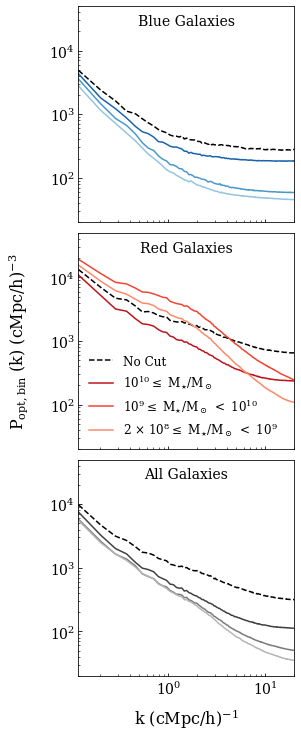

In [4]:

ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy', 'snapshot':99}
fg = ds.figrid('gal_res', 'color', '', ip)
fg.gspecArgs(hspace = 0.05, yborder = [0, 0.25])
fg.rowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'], pos = [0.5, 0.9])
fg.rowLabelArgs(ha = 'center')
fg.legendArgs(loc = 'lower left', fontsize = 12, slc = (1, 0))
fg.plotOrder(['diemer', 'high-bin', 'mid-bin', 'low-bin'])
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (2e1, 5e4))

gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        fg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
fg.plotArgs('diemer', linestyle = '--', color = 'black')
fg.setYLabel(YLAB%r"\mathrm{opt, bin}")
fg.setXLabel(XLAB)
fg.plot()
# fg.save("galaxy_auto_stmass_bins_colorR.png")
# fg.save(DRAFTPATH + "galaxy_auto_stmass_bins_colorR.pdf")

The row values for : ['no key found']
The column values for : ['no key found']


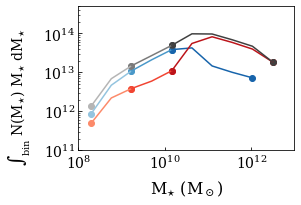

In [6]:
ip = {'is_hist':True, 'fieldname':'galaxy', 'is_hydrogen':False, 'censat':'both'}
def coolplot(ax, data, args):
    new_args = copy.deepcopy(args)
    cmaps['blue'] = seaborn.color_palette('Blues', 4)
    cmaps['red'] = seaborn.color_palette('Reds', 4)
    cmaps['gray'] = seaborn.color_palette('Greys', 4)
    
    cmap = cmaps[args['color']]
    idx = [0, 3, 5, len(data[0])]
    for i in range(3):
        new_args['color'] = cmap[i + 1]
        if i == 0: 
            x = data[0][idx[i]:idx[i+1]]
            y = data[1][idx[i]:idx[i+1]]
        else:
            x = data[0][idx[i]-1:idx[i+1]]
            y = data[1][idx[i]-1:idx[i+1]]

        mask = y > 0
        ax.plot(x[mask], y[mask], **new_args)
        ax.scatter([x[mask][0], x[mask][-1]], [y[mask][0], y[mask][-1]], color = new_args['color'])
    return
    
hgfg = ds.figrid('color', '', '', ip)
hgfg.setPanelsize(3, 2)
hgfg.gspecArgs(yborder = [0.5, 0.33])
hgfg.axisLabelArgs('y', fontsize = 14)
hgfg.setXLabel(r"M$_{\mathrm{\star}}$ (M$_\odot$)")
hgfg.setYLabel(r"$\int_{\mathrm{bin}}$ N(M$_{\rm{\star}}$) M$_{\rm{\star}}$ dM$_{\rm{\star}}$")
hgfg.setFunc({'is_hist':True}, coolplot)
hgfg.axisArgs(xlim = (1e8, 1e13), ylim = (1e11, 5e14))
hgfg.plot()
hgfg.setLegend(visible = False)
# hgfg.save("histogram_galaxies.png")
# hgfg.save(DRAFTPATH + "histogram_galaxies.pdf")

# Galaxy x HI cross-power

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


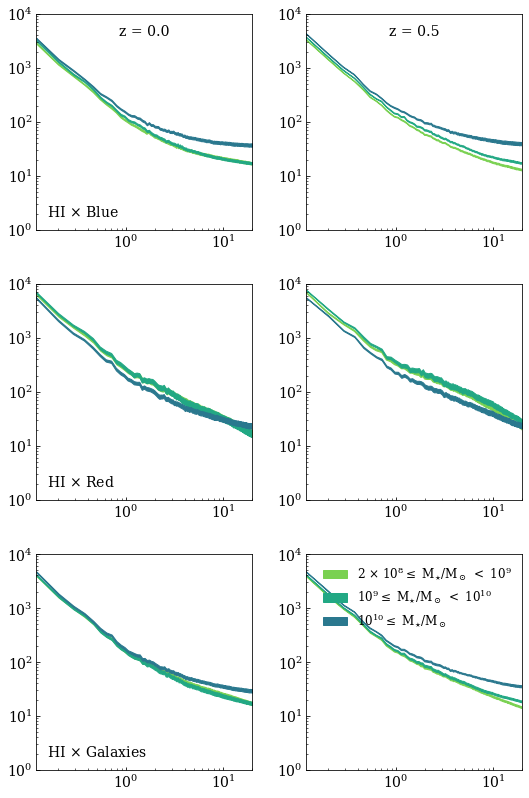

In [7]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt'], 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)
fg.axisArgs(ylim = (1, 1e4))
fg.autoFill()
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67]


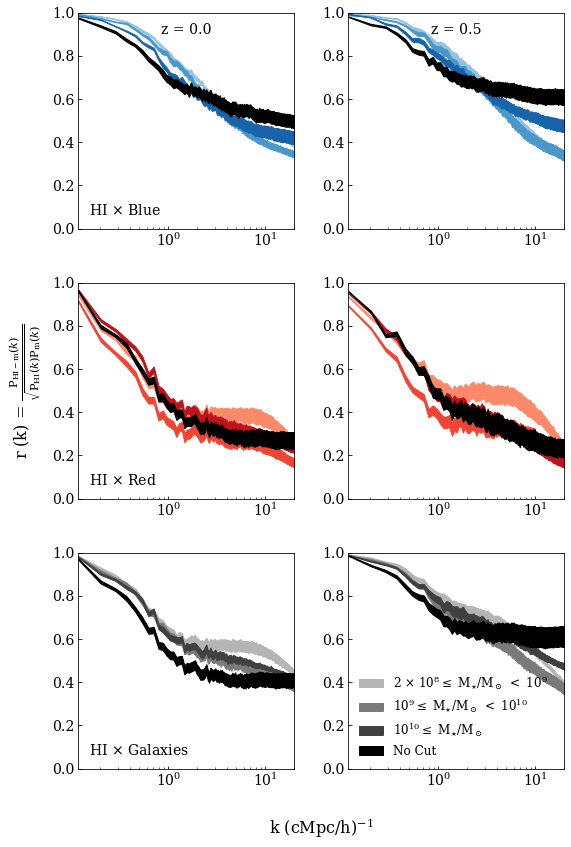

In [18]:
ip = {'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['galbt', 'fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('gal_res', 'color', 'snapshot', ip)

gal_res = ip['gal_res'][:3]

cmaps = {}
cmaps['blue'] = seaborn.color_palette('Blues', len(gal_res) + 1)
cmaps['red'] = seaborn.color_palette('Reds', len(gal_res)+ 1)
cmaps['resolved'] = seaborn.color_palette('Greys', len(gal_res) + 1)
for c in ip['color']:
    for b in range(len(gal_res)):
        col = cmaps[c][b+1]
        fg.plotArgs({'color':c, 'gal_res':gal_res[b]}, {'color':col})
        fg.plotArgs('diemer', linestyle = '--', color = 'black')
fg.setYLabel(CORRCOEF)
fg.setXLabel(XLAB)
fg.legendArgs(loc = 'lower left', slc = (-1, -1))
fg.axisArgs(yscale = 'linear', ylim = (0, 1))
fg.autoFill()
fg.plot()

In [14]:
ds.printMatching({'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial'], 'gal_res':bins + ['diemer'], 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'corr_coef', 'HI_fieldname':'hisubhalo'})

{'path': 'fiducial', 'result_runtime': 53.740915060043335, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo', 'post_process': 'corr_coef'}

{'path': 'fiducial', 'result_runtime': 53.715466260910034, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_h

# Centrals/Satellites Galaxy Auto Power

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


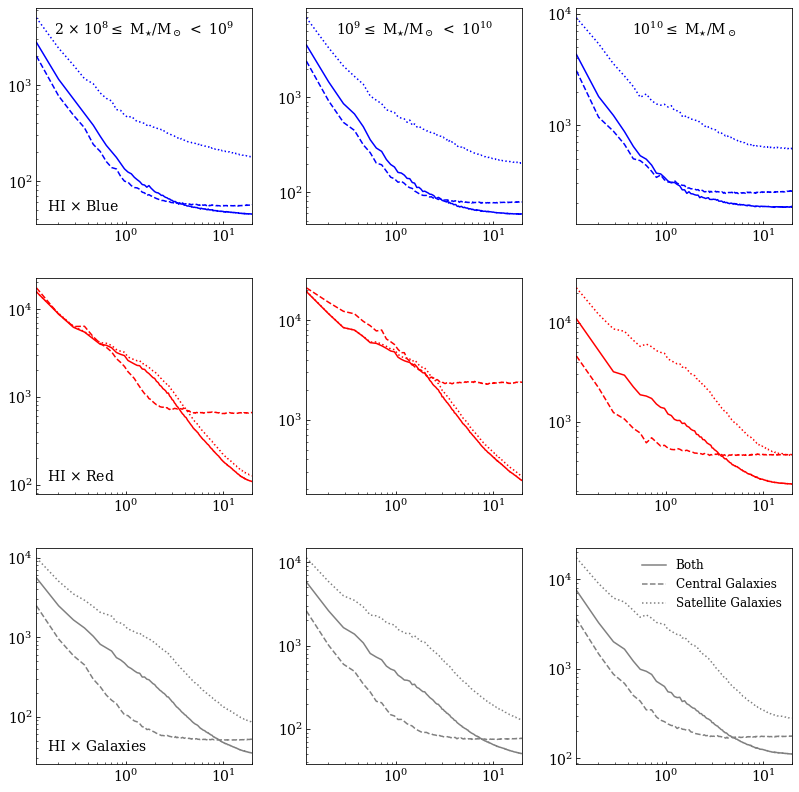

In [9]:
ip = {'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'galbt'], 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'fieldname':'galaxy'}
ip['censat'] += ['satellites', 'centrals']
ip['snapshot'] = 99
ip['gal_res'] = bins
fg = ds.figrid('censat', 'color', 'gal_res', ip)
fg.plotArgs('satellites', linestyle = 'dotted')
fg.plotArgs('centrals', linestyle = 'dashed')
fg.plotArgs({'color':'blue'}, color = 'blue')
fg.plotArgs({'color':'red'}, color = 'red')
fg.plotArgs({'color':'resolved'}, color = 'gray')
fg.plot()

# Centrals/Satellites in Galaxy x HI cross-power

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


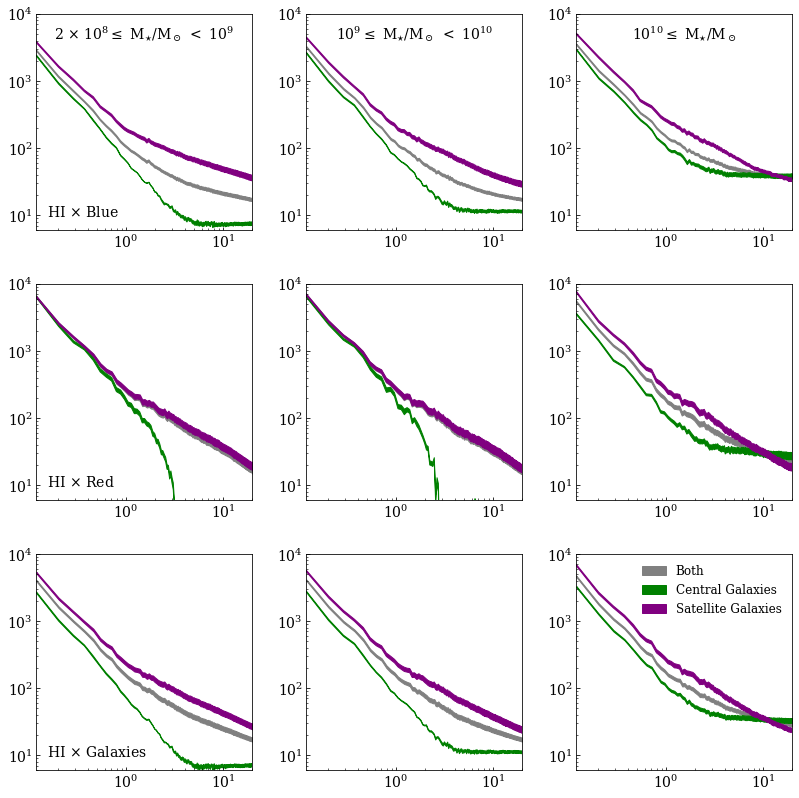

In [10]:
ip = {'is_auto':False, 'censat':['both_satellites', 'both_centrals', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':99, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('censat', 'color', 'gal_res', ip)
blue_colors = seaborn.color_palette("mako", 3)
fg.plotArgs('both', color = 'gray', label = 'Both')
fg.plotArgs('both_satellites', color = 'purple', label = 'Satellite Galaxies')
fg.plotArgs('both_centrals', color = 'green', label = 'Central Galaxies')
fg.autoFill()
fg.axisArgs(ylim = (6, 1e4))
fg.plot()

The row values for color: ['blue', 'red', 'resolved']
The column values for gal_res: ['low-bin', 'mid-bin', 'high-bin']


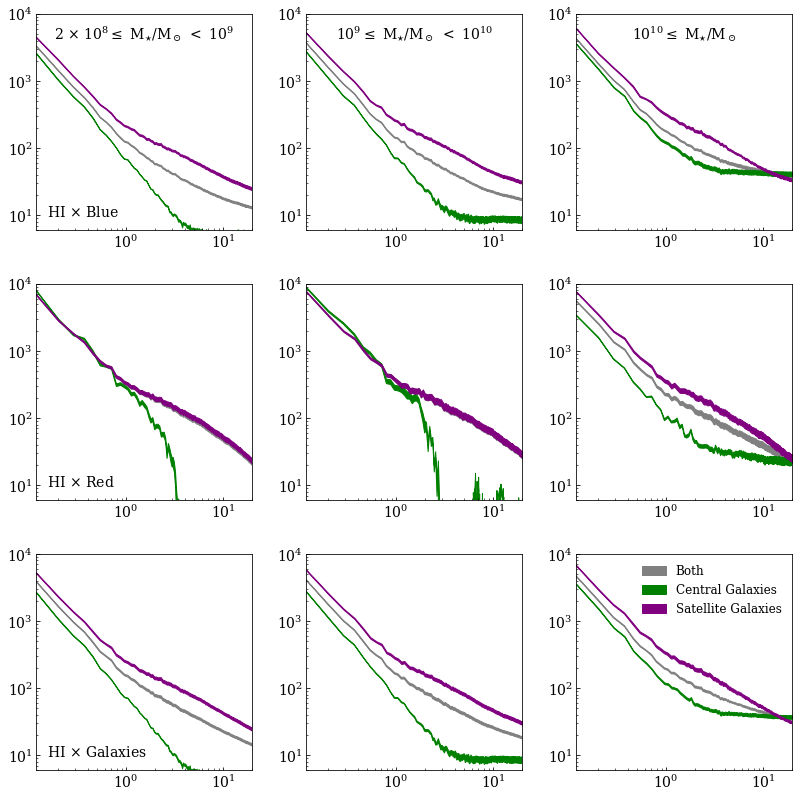

In [19]:
ip = {'is_auto':False, 'censat':['both_satellites', 'both_centrals', 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':'galbt', 'gal_res':bins, 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found', 'snapshot':67, 'HI_fieldname':'hisubhalo'}
fg = ds.figrid('censat', 'color', 'gal_res', ip)
blue_colors = seaborn.color_palette("mako", 3)
fg.plotArgs('both', color = 'gray', label = 'Both')
fg.plotArgs('both_satellites', color = 'purple', label = 'Satellite Galaxies')
fg.plotArgs('both_centrals', color = 'green', label = 'Central Galaxies')
fg.autoFill()
fg.axisArgs(ylim = (6, 1e4))
fg.plot()